# HW2: Career Insights

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print(os.listdir('.'))

#GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'hw2'
#GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', 'DS101', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
#print(os.listdir(GOOGLE_DRIVE_PATH))

['.config', 'job_postings.csv', 'industries.csv', 'job_industries.csv', 'IMDB-Movie-Data.csv', 'drive', 'sample_data']


In [3]:
import pandas as pd
csv_file_path_jobs = 'job_postings.csv'
csv_file_path_industries = 'industries.csv'
csv_file_path_job_industries = 'job_industries.csv'
jobs_df = pd.read_csv(csv_file_path_jobs)

#jobs_df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'job_postings.csv'))

In [4]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

## Task1: Get info about the job postings

In [5]:
jobs_df.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'scraped'],
      dtype='object')

Drop unrelated columns:

In [6]:
cols_to_drop = ['description', 'applies', 'original_listed_time', 'remote_allowed', 'views', 'job_posting_url', 'application_url',
                  'application_type', 'expiry', 'closed_time', 'skills_desc', 'listed_time', 'posting_domain', 'sponsored', 'scraped']
# TODO: drop the above columns with one line of code
jobs_df.drop(columns=cols_to_drop, inplace=True)

In [7]:
# Now inspect the remaining data
jobs_df.head(10)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,formatted_experience_level,work_type,currency,compensation_type
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",Entry level,FULL_TIME,USD,BASE_SALARY
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,FULL_TIME,NaN,NaN
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,FULL_TIME,NaN,NaN
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",Entry level,FULL_TIME,USD,BASE_SALARY
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,Mid-Senior level,FULL_TIME,USD,BASE_SALARY
5,3757937037,13727.0,Territory Manager - New Haven,NaN,NaN,NaN,NaN,Full-time,United States,Mid-Senior level,FULL_TIME,NaN,NaN
6,3757937004,10515052.0,Auto Body Techncian,NaN,NaN,NaN,NaN,Full-time,"Daytona Beach, FL",Entry level,FULL_TIME,NaN,NaN
7,3757936167,2915.0,"ACME D8- Asst Store Director (ASD) Sussex, NJ",NaN,NaN,NaN,NaN,Full-time,"Sussex, NJ",Mid-Senior level,FULL_TIME,NaN,NaN
8,3757936097,18213359.0,Dishwasher,NaN,19.30,NaN,HOURLY,Full-time,"Aliso Viejo, CA",Entry level,FULL_TIME,USD,BASE_SALARY
9,3757936026,634806.0,Instrumentation Quality Control Representative...,NaN,NaN,NaN,NaN,Contract,United States,Entry level,CONTRACT,NaN,NaN


## Task 2: Merge industry ID with jobs_df
Based on one anchor column, you can merge the data from two sources (csv charts in this case into one DataFrame).

In [8]:
industries_df = pd.read_csv(csv_file_path_job_industries)# industries_df = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'job_industries.csv'))

In [9]:
# TODO: perform a left join on "job_id" to jobs_df
jobs_df = pd.merge(jobs_df, industries_df, on='job_id', how='left')

In [10]:
jobs_df.head()

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,formatted_experience_level,work_type,currency,compensation_type,industry_id
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",Entry level,FULL_TIME,USD,BASE_SALARY,17.0
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,FULL_TIME,NaN,NaN,135.0
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,FULL_TIME,NaN,NaN,147.0
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",Entry level,FULL_TIME,USD,BASE_SALARY,100.0
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,United States,Mid-Senior level,FULL_TIME,USD,BASE_SALARY,27.0


## Task 3: Data cleaning
To further process the data, we need to perform data cleaning to remove or fill entries with null values.

**Step 0:** Check for the nulls

In [11]:
# TODO: remove rows with duplicated job_id inplace
jobs_df.drop_duplicates(subset='job_id', inplace=True)

In [12]:
# TODO: check the number of nulls for each column in jobs_df
jobs_df.isnull().sum()

job_id                            0
company_id                      654
title                             0
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                    19894
formatted_work_type               0
location                          0
formatted_experience_level     9181
work_type                         0
currency                      19894
compensation_type             19894
industry_id                     544
dtype: int64

**Step 1:** Remove the rows with a null value in the 'currency', 'compensation_type', and 'industry_id' columns.

In [13]:
# TODO: drop the rows with a null value in the 'currency' and 'compensation_type' inplace
# Hint: try the subset parameter!
jobs_df.dropna(subset=['currency', 'compensation_type'], inplace=True)

In [14]:
# TODO: now inspect the nulls again
jobs_df.isnull().sum()

job_id                            0
company_id                      222
title                             0
max_salary                     2241
med_salary                    11111
min_salary                     2241
pay_period                        0
formatted_work_type               0
location                          0
formatted_experience_level     3562
work_type                         0
currency                          0
compensation_type                 0
industry_id                     164
dtype: int64

**Step 2**: For rows that have null 'med_salary', replace the null value with the estimate from an average between 'max_salary' and 'min_salary'.

In [15]:
# TODO: as described above
jobs_df['med_salary'].fillna((jobs_df['max_salary'] + jobs_df['min_salary']) / 2, inplace=True)

In [16]:
# Now inspect the salary numbers again to make sure the calculations are correct
jobs_df.head(10)

,job_id,company_id,title,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,formatted_experience_level,work_type,currency,compensation_type,industry_id
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",Entry level,FULL_TIME,USD,BASE_SALARY,17.0
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",Entry level,FULL_TIME,USD,BASE_SALARY,100.0
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,240895.00,205956.0,YEARLY,Full-time,United States,Mid-Senior level,FULL_TIME,USD,BASE_SALARY,27.0
10,3757936097,18213359.0,Dishwasher,NaN,19.30,NaN,HOURLY,Full-time,"Aliso Viejo, CA",Entry level,FULL_TIME,USD,BASE_SALARY,100.0
13,3757935381,19181907.0,Insights Analyst - Auto Industry,64000.0,61000.00,58000.0,YEARLY,Full-time,United States,Entry level,FULL_TIME,USD,BASE_SALARY,97.0
21,3757935001,73013724.0,Sales Manager,350000.0,237500.00,125000.0,YEARLY,Full-time,"Coeur d'Alene, ID",Mid-Senior level,FULL_TIME,USD,BASE_SALARY,43.0
25,3757934423,18213359.0,Custodian/Janitor,NaN,19.30,NaN,HOURLY,Full-time,"Altadena, CA",Entry level,FULL_TIME,USD,BASE_SALARY,100.0
26,3757934347,10515052.0,Body Technician,30.0,25.00,20.0,HOURLY,Full-time,"Waukesha, WI",Entry level,FULL_TIME,USD,BASE_SALARY,3198.0
29,3757934319,18391435.0,Controls Engineer,150000.0,135500.00,121000.0,YEARLY,Full-time,"Orlando, FL",Mid-Senior level,FULL_TIME,USD,BASE_SALARY,135.0
30,3757934318,6577380.0,CDL Class B Driver,27.0,26.00,25.0,HOURLY,Full-time,"Oakland, CA",Mid-Senior level,FULL_TIME,USD,BASE_SALARY,92.0


In [17]:
# TODO: inspect the nulls again
jobs_df.isnull().sum()

job_id                           0
company_id                     222
title                            0
max_salary                    2241
med_salary                       0
min_salary                    2241
pay_period                       0
formatted_work_type              0
location                         0
formatted_experience_level    3562
work_type                        0
currency                         0
compensation_type                0
industry_id                    164
dtype: int64

In [18]:
# TODO: now you should be fine with droping out the 'max_salary' and 'min_salary' columns, do that inplace
jobs_df.drop(columns=['max_salary', 'min_salary'], inplace=True)

**Step 3:** Check the shape of the current jobs_df



In [19]:
jobs_df.shape

(13352, 12)

## Task 3: Salary normalization
As you might have noticed, the salary of each job posting can have different pay periods (e.g. hourly, weekly, monthly, etc), which makes it hard to come up with meaningful analysis without any preprocessing.

Please normalize the salary of the resulting data from task 2 to yearly pay and use a separate data structure to store all rows with normalized salary information.

Valid pay period types are: HOURLY, WEEKLY, MONTHLY, YEARLY

Hint:

1 year = 12 month = 52 weeks

5 work days a week -> 21.67 work days per month

assume 8 hours per work day




**Step 0:** Before getting started, check the value type of the 'pay_period' column, to make sure that all entries are handled properly.

In [20]:
jobs_df['pay_period'].value_counts()

pay_period
YEARLY     8009
HOURLY     5036
MONTHLY     224
WEEKLY       82
ONCE          1
Name: count, dtype: int64

**Step 1:** You may notice that there is one outlier row that has an invalid pay period entry. Locate and remove that row inplace from your jobs_df.

In [21]:
# TODO: locate and remove the row with the outlier entry
# Hint: try out df.loc!
outlier_entry = jobs_df.loc[jobs_df['pay_period'] == 'ONCE'].index
jobs_df.drop(index=outlier_entry, inplace=True)

In [22]:
# Check the value counts again
jobs_df['pay_period'].value_counts()

pay_period
YEARLY     8009
HOURLY     5036
MONTHLY     224
WEEKLY       82
Name: count, dtype: int64

**Step 2:** Extract all jobs with yearly salary into a new dataframe, name it as salaries_df.

In [23]:
# TODO: extract all jobs with yearly salary into salaries_df
salaries_df = jobs_df[jobs_df['pay_period'] == 'YEARLY'].copy()


Step 3: Extract all jobs with monthly salary, calculate the yearly salary, then append these rows to salaries_df.

In [24]:
# TODO: extract all jobs with monthly pay_period to salaries_monthly_df
salaries_monthly_df = jobs_df[jobs_df['pay_period'] == 'MONTHLY'].copy()


In [25]:
# TODO: multiply all entries under column 'med_salary' by 12
salaries_monthly_df['med_salary'] *= 12

# TODO: change all entries under column 'pay_period' to 'YEARLY'
salaries_monthly_df['pay_period'] = 'YEARLY'


In [26]:
# TODO: concat salaries_monthly_df and salaries_df to form an updated salaries_df
salaries_df = pd.concat([salaries_df, salaries_monthly_df], ignore_index=True)


In [27]:
# Check the value counts again
salaries_df['pay_period'].value_counts()

pay_period
YEARLY    8233
Name: count, dtype: int64

Step 4: Extract all jobs with weekly salary, calculate the yearly salary, then append these rows to salaries_df.

In [28]:
# TODO: mimic the procedure you take in step 3, note that this time you'll need a different normalization multiplier
salaries_weekly_df = jobs_df[jobs_df['pay_period'] == 'WEEKLY'].copy()
salaries_weekly_df['med_salary'] *= 52
salaries_weekly_df['pay_period'] = 'YEARLY'
salaries_df = pd.concat([salaries_df, salaries_weekly_df], ignore_index=True)
salaries_df['pay_period'].value_counts()

pay_period
YEARLY    8315
Name: count, dtype: int64

Step 5: Extract all jobs with hourly salary, calculate the yearly salary, then append these rows to salaries_df.

In [29]:
# TODO: mimic the procedure you take in step 3, note that this time you'll need a different normalization multiplier
salaries_hourly_df = jobs_df[jobs_df['pay_period'] == 'HOURLY'].copy()
# 8 hours per day, 21.67 workdays per month, 12 month
salaries_hourly_df['med_salary'] *= (8 * 21.67 * 12)
salaries_hourly_df['pay_period'] = 'YEARLY'
salaries_df = pd.concat([salaries_df, salaries_hourly_df], ignore_index=True)

In [30]:
# Describe this updated dataframe
salaries_df.describe()

,job_id,company_id,med_salary,industry_id
count,1.335100e+04,1.312900e+04,1.335100e+04,13187.000000
mean,3.723136e+09,1.047695e+07,1.425799e+05,100.402593
std,8.938704e+07,2.274742e+07,3.416706e+06,350.372997
min,3.958427e+06,1.009000e+03,0.000000e+00,1.000000
25%,3.697357e+09,1.627200e+04,5.200800e+04,17.000000
50%,3.748842e+09,3.363800e+05,8.250000e+04,47.000000
75%,3.756904e+09,6.423011e+06,1.238000e+05,96.000000
max,3.757940e+09,1.011741e+08,3.432528e+08,3243.000000


## Task 4: Data visualization

In [31]:
import matplotlib.pyplot as plt

**Step 1:** Let's start with plotting the work type distribution

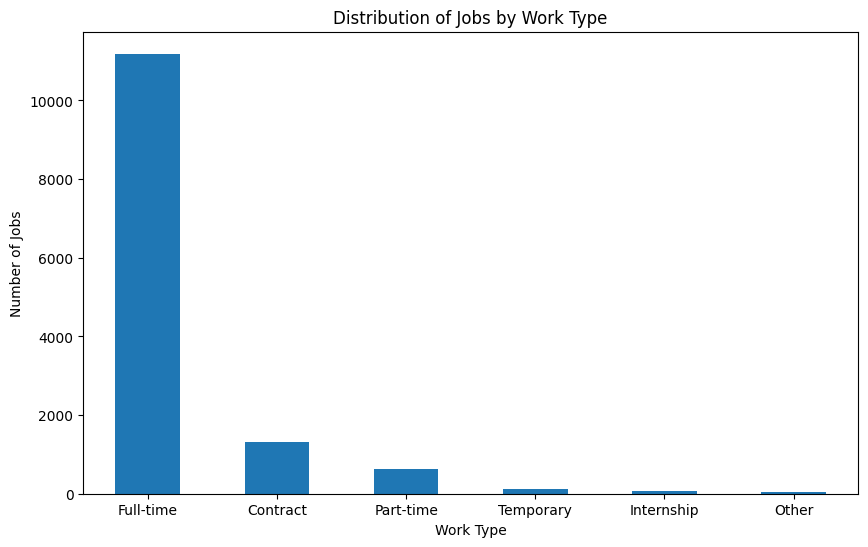

In [32]:
work_type_distribution = salaries_df['formatted_work_type'].value_counts()
# Plot
plt.figure(figsize=(10, 6))
work_type_distribution.plot(kind='bar')
plt.title('Distribution of Jobs by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=360)
plt.show()

**Step 2:** Then inspect the distribution of jobs by experience level.

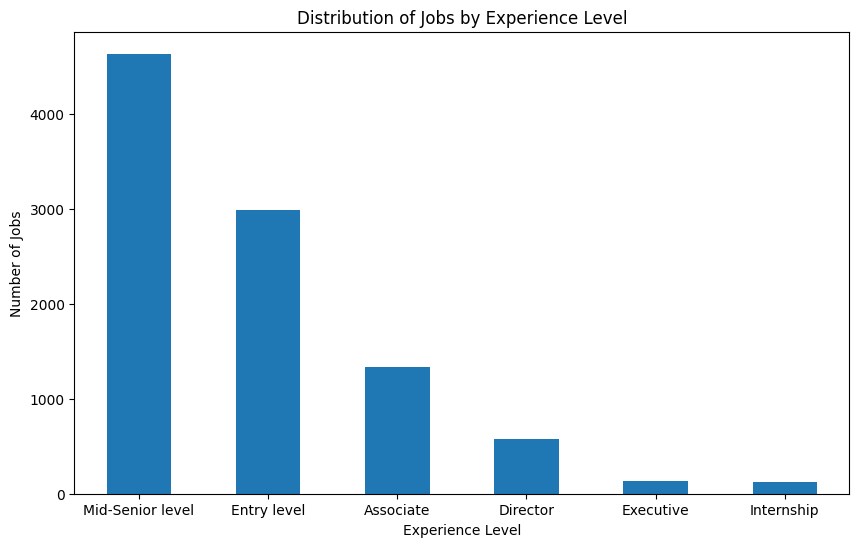

In [33]:
# TODO: as described above
experience_level_distribution = salaries_df['formatted_experience_level'].value_counts()

# TODO: plot the distribution of jobs by experience level
plt.figure(figsize=(10, 6))
experience_level_distribution.plot(kind='bar')
plt.title('Distribution of Jobs by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=360)
plt.show()


**Step 3:** Figure out the industries with most job postings.

In [34]:
# TODO: find the corresponding industry name from industries.csv, incorporate this information to salaries_df
# Hint: the merge should be anchored on 'industry_id'
industries_df = pd.read_csv('industries.csv')
salaries_df = pd.merge(salaries_df, industries_df[['industry_id', 'industry_name']], on='industry_id', how='left')


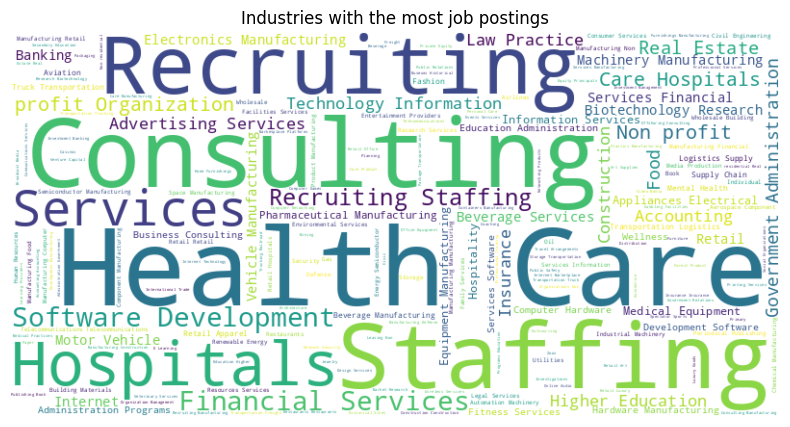

In [35]:
from wordcloud import WordCloud

# Combine all text in the 'TextColumn' into a single string
text = ' '.join(salaries_df['industry_name'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Industries with the most job postings')
plt.axis('off')
plt.show()

**Step 4:** Find the salary range for 5 industries that your are interested in (you can refer to their names in industries.csv), express this information with a box plot.

<Figure size 1000x600 with 0 Axes>

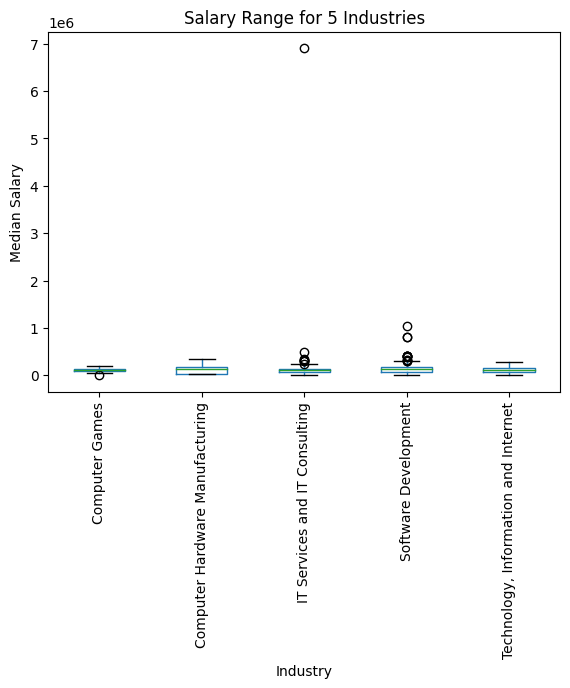

In [36]:
# TODO: ^
salaries_df['industry_name'].unique()
industries_5 = ['IT Services and IT Consulting', 'Computer Hardware Manufacturing', 'Software Development', 'Technology, Information and Internet', 'Computer Games']
industries_5_df = salaries_df[salaries_df['industry_name'].isin(industries_5)]

plt.figure(figsize=(10, 6))
industries_5_df.boxplot(column='med_salary', by='industry_name', grid=False)
plt.title('Salary Range for 5 Industries')
plt.suptitle('')
plt.xlabel('Industry')
plt.ylabel('Median Salary')
plt.xticks(rotation=90)
plt.show()




hw2 bonus question:
Use the IMDB Movies dataset, exercies necessary preprocessing steps, then split it into train and validation sets (80% : 20% ratio). Take all or some of the numerical features provided in this dataset other than "revenue" and train a regression model that predicts revenue based on the feature you select. Evaluate the performance of your model with the validation split and report the errors in RMSE. You can use any libraries or tools to accomplish the above, and you'll need to present your steps & results in a python notebook (.ipynb).
You can get up to 5 bonus points by doing this homework, which will be added directly to your final grade.

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

In [38]:
csv_file_path_movies = 'IMDB-Movie-Data.csv'
movies_df = pd.read_csv(csv_file_path_movies)

In [39]:
movies_df.info()
movies_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [49]:
movies_df = movies_df.dropna(subset=['Revenue (Millions)'])
train_df, val_df = train_test_split(movies_df, test_size=0.2)


In [41]:

features = ['Votes', 'Runtime (Minutes)', 'Rating', 'Metascore']
revenue = 'Revenue (Millions)'




In [42]:
X_train = train_df[features]
y_train = train_df[revenue]
X_val = val_df[features]
y_val = val_df[revenue]


In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

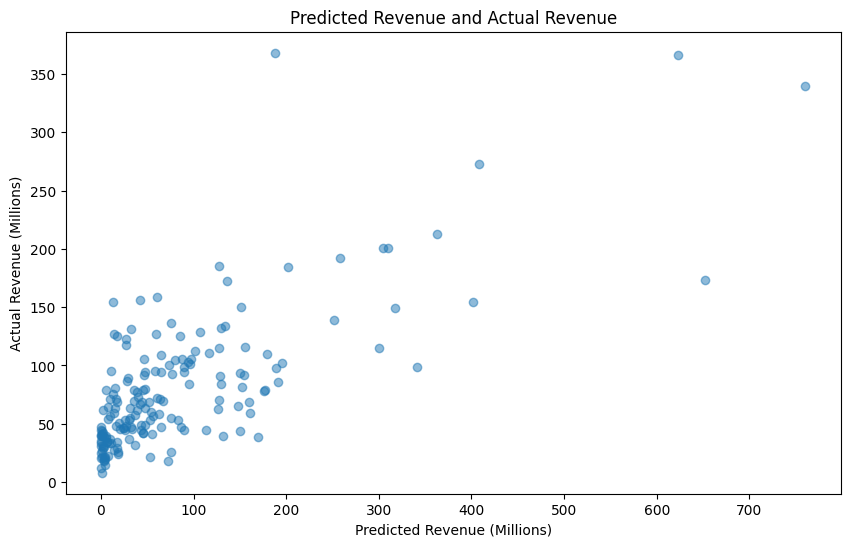

In [46]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
f'RMSE: {rmse}'

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.xlabel('Predicted Revenue (Millions)')
plt.ylabel('Actual Revenue (Millions)')
plt.title('Predicted Revenue and Actual Revenue')
plt.show()